In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter  # 필요한 모듈 가져오기

plt.rcParams['font.family'] = 'Pretendard'

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
bus_df = pd.read_csv('월별버스이용자유형별패널티현황.csv', encoding='cp949')

bus_df.head()

,연월,교통 수단 구분,이용자 구분,패널티 수,이용자 수
0,201806,"간선(일반, 제주, 서귀포)",경로,0,1904
1,201806,"간선(일반, 제주, 서귀포)",어린이,0,220
2,201806,"간선(일반, 제주, 서귀포)",유공 일반,0,74
3,201806,"간선(일반, 제주, 서귀포)",일반,39,9461
4,201806,"간선(일반, 제주, 서귀포)",장애 동반,0,319


In [5]:
ne_df = pd.read_csv('제주특별자치도_제주시내버스노선현황_20221231.csv', encoding='cp949')

ne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   구분            71 non-null     object 
 1   노선명           71 non-null     object 
 2   운행구간          71 non-null     object 
 3   거리(km)        71 non-null     float64
 4   1일운행횟수        71 non-null     int64  
 5   배차간격(분) (평일)  71 non-null     object 
 6   운행대수 (평일)     71 non-null     int64  
 7   운행업체          71 non-null     object 
 8   비고            71 non-null     object 
 9   데이터기준일자       71 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 5.7+ KB


In [6]:
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연월        2715 non-null   int64 
 1   교통 수단 구분  2715 non-null   object
 2   이용자 구분    2715 non-null   object
 3   패널티 수     2715 non-null   int64 
 4   이용자 수     2715 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 106.2+ KB


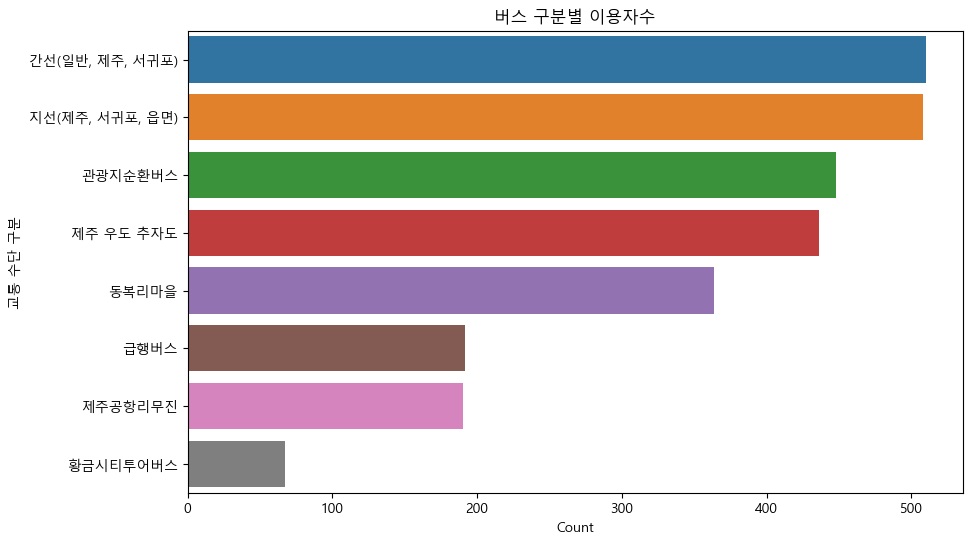

In [7]:
# 막대 그래프 생성
plt.figure(figsize=(10, 6))
sns.countplot(data=bus_df, y='교통 수단 구분', order=bus_df['교통 수단 구분'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('교통 수단 구분')
plt.title('버스 구분별 이용자수')
plt.show()

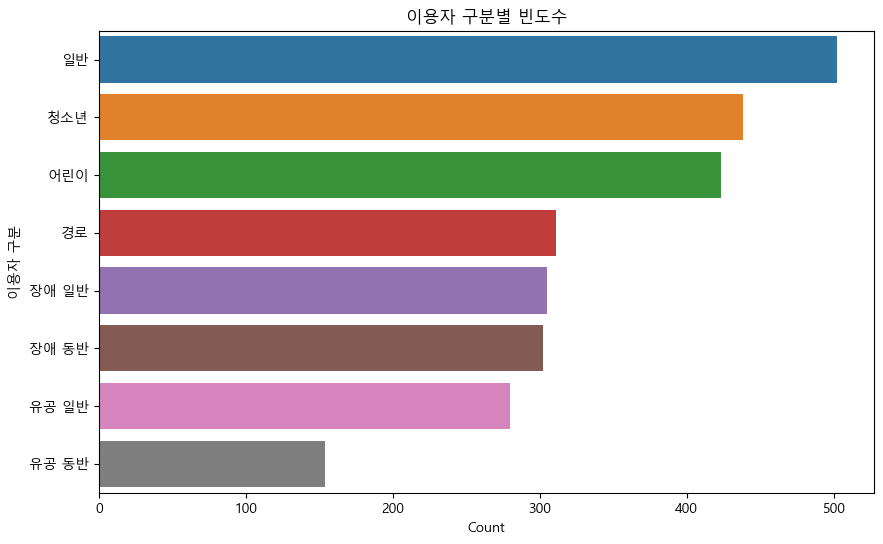

In [8]:
# 막대 그래프 생성
plt.figure(figsize=(10, 6))
sns.countplot(data=bus_df, y='이용자 구분', order=bus_df['이용자 구분'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('이용자 구분')
plt.title('이용자 구분별 빈도수')
plt.show()

In [19]:
# '연월' 열의 데이터 타입을 문자열로 변환
bus_df['연월'] = bus_df['연월'].astype(str)

# 연도와 월을 나눠서 새로운 열 추가
bus_df['연도'] = bus_df['연월'].str[:4]  # 연도 추출
bus_df['월'] = bus_df['연월'].str[4:]    # 월 추출

In [20]:
bus_df.head()

,연월,교통 수단 구분,이용자 구분,패널티 수,이용자 수,연도,월
0,201806,"간선(일반, 제주, 서귀포)",경로,0,1904,2018,06
1,201806,"간선(일반, 제주, 서귀포)",어린이,0,220,2018,06
2,201806,"간선(일반, 제주, 서귀포)",유공 일반,0,74,2018,06
3,201806,"간선(일반, 제주, 서귀포)",일반,39,9461,2018,06
4,201806,"간선(일반, 제주, 서귀포)",장애 동반,0,319,2018,06


In [21]:
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연월        2715 non-null   object
 1   교통 수단 구분  2715 non-null   object
 2   이용자 구분    2715 non-null   object
 3   패널티 수     2715 non-null   int64 
 4   이용자 수     2715 non-null   int64 
 5   연도        2715 non-null   object
 6   월         2715 non-null   object
dtypes: int64(2), object(5)
memory usage: 148.6+ KB


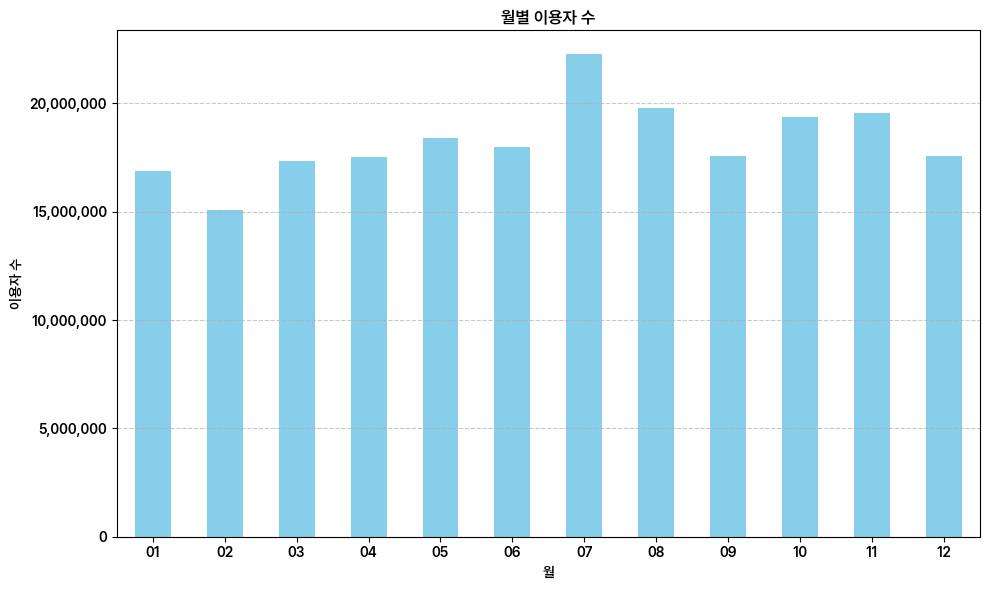

In [27]:
# 월별 이용자 수 계산
monthly_data = bus_df.groupby('월')['이용자 수'].sum()

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
monthly_data.plot(kind='bar', color='skyblue', ax=ax)

# 축 형식 조정
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # 숫자 형식 지정
ax.yaxis.set_major_formatter(formatter)  # 축에 적용

plt.title('월별 이용자 수')
plt.xlabel('월')
plt.ylabel('이용자 수')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

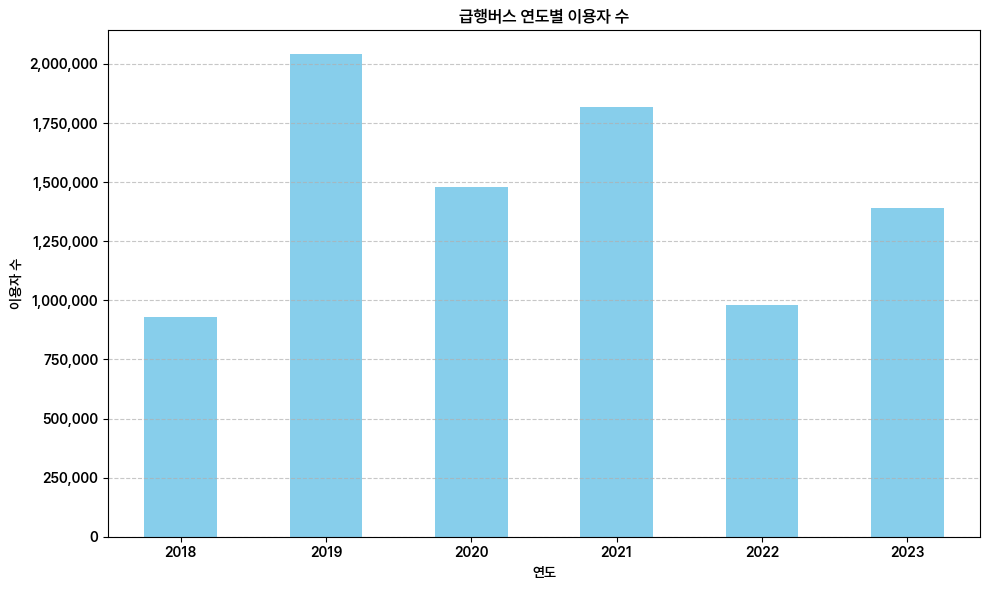

In [28]:
# '교통 수단 구분'이 '급행버스'인 경우만 필터링
express_bus_df = bus_df[bus_df['교통 수단 구분'] == '급행버스']

# 연도별 이용자 수 계산
yearly_data = express_bus_df.groupby('연도')['이용자 수'].sum()

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
yearly_data.plot(kind='bar', color='skyblue', ax=ax)

# 축 형식 조정
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # 숫자 형식 지정
ax.yaxis.set_major_formatter(formatter)  # 축에 적용

plt.title('급행버스 연도별 이용자 수')
plt.xlabel('연도')
plt.ylabel('이용자 수')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

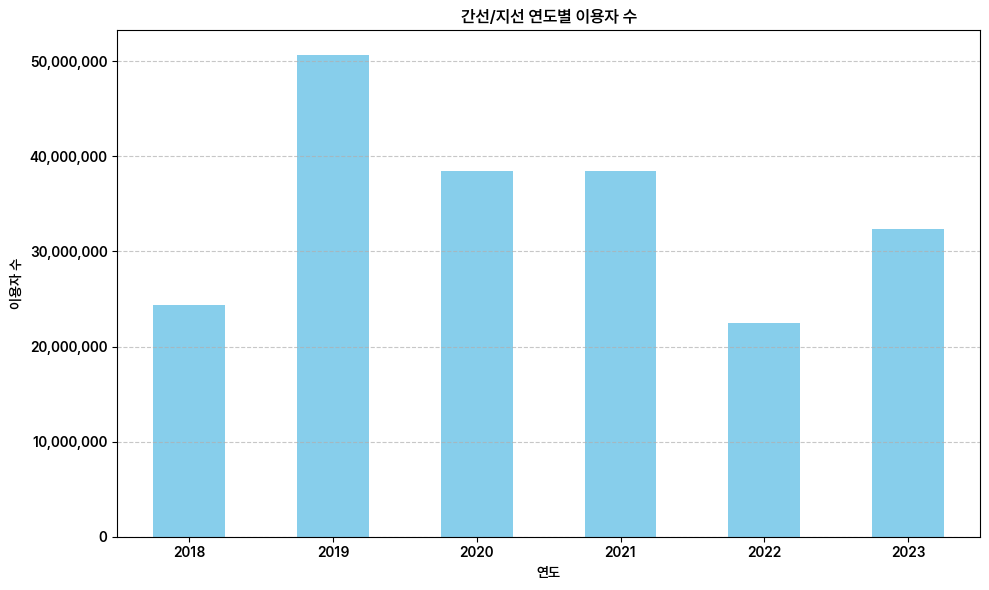

In [29]:
# '교통 수단 구분'이 '간선(일반, 제주, 서귀포)' 또는 '지선(제주, 서귀포, 읍면)'인 경우만 필터링
filtered_df = bus_df[(bus_df['교통 수단 구분'] == '간선(일반, 제주, 서귀포)') | (bus_df['교통 수단 구분'] == '지선(제주, 서귀포, 읍면)')]

# 연도별 이용자 수 계산
yearly_data = filtered_df.groupby('연도')['이용자 수'].sum()

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
yearly_data.plot(kind='bar', color='skyblue', ax=ax)

# 축 형식 조정
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # 숫자 형식 지정
ax.yaxis.set_major_formatter(formatter)  # 축에 적용

plt.title('간선/지선 연도별 이용자 수')
plt.xlabel('연도')
plt.ylabel('이용자 수')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
station_df = pd.read_csv('제주특별자치도_버스노선현황.csv', encoding='cp949')

station_df.head()

,구분,노선명,운행구간,거리(km),1일운행횟수,최소배차간격시간,최대배차간격시간,운행대수 (평일),운행업체,비고,데이터기준일자,광역단체
0,간선,311.0,"한라수목원, 제주시, 탐라도서관, 제주시, 노형오거리, 제주시, 한라병원, 제주시,...",26.1,64.0,20.0,45.0,9.0,삼화여객,휴일감차,2022-12-31,제주시
1,간선,312.0,"한라수목원, 제주시, 탐라도서관, 제주시, 노형오거리, 제주시, 한라병원, 제주시,...",29.2,55.0,25.0,50.0,8.0,삼화여객,휴일감차,2022-12-31,제주시
2,간선,315.0,"수산, 제주시, 하귀, 제주시, 외도, 제주시, 월광로, 제주시, 백록초, 제주시,...",27.6,48.0,30.0,45.0,7.0,제주여객,없음,2022-12-31,제주시
3,간선,316.0,"번대, 제주시, 하귀, 제주시, 외도, 제주시, 오광로, 제주시, 백록초, 제주시,...",28.7,48.0,35.0,55.0,7.0,제주여객,없음,2022-12-31,제주시
4,간선,320.0,"수산, 제주시, 하귀, 제주시, 외도, 제주시, 도평, 제주시, 광평, 제주시, 한...",28.2,76.0,8.0,42.0,11.0,삼영교통,휴일감차,2022-12-31,제주시


In [31]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   구분         95 non-null     object 
 1   노선명        95 non-null     float64
 2   운행구간       95 non-null     object 
 3   거리(km)     95 non-null     float64
 4   1일운행횟수     95 non-null     float64
 5   최소배차간격시간   95 non-null     float64
 6   최대배차간격시간   95 non-null     float64
 7   운행대수 (평일)  95 non-null     float64
 8   운행업체       95 non-null     object 
 9   비고         95 non-null     object 
 10  데이터기준일자    95 non-null     object 
 11  광역단체       95 non-null     object 
dtypes: float64(6), object(6)
memory usage: 9.1+ KB


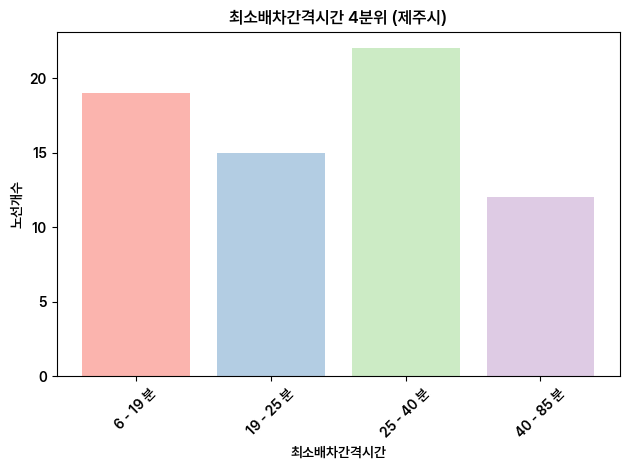

In [32]:
# '광역단체' 컬럼이 '제주시'인 경우에 대해서만 필터링
filtered_df = station_df[station_df['광역단체'] == '제주시']

# 최소배차간격시간을 기준으로 데이터를 정렬합니다.
sorted_df = filtered_df.sort_values(by='최소배차간격시간')

# 최소배차간격시간 열의 값들을 5분위로 나눕니다.
quantiles = sorted_df['최소배차간격시간'].quantile([0, 0.25, 0.5, 0.75, 1])

# 5분위 값들을 리스트로 변환합니다.
quantiles_list = quantiles.tolist()

# 각 분위의 시간 범위를 계산합니다.
time_ranges = [f'{int(quantiles_list[i])} - {int(quantiles_list[i+1])} 분' for i in range(len(quantiles_list)-1)]

# 분위별로 데이터를 그룹화하고 각 그룹의 개수를 세어줍니다.
grouped_df = sorted_df.groupby(pd.cut(sorted_df['최소배차간격시간'], bins=quantiles_list)).size()

# 시각화를 위해 바 그래프를 사용합니다.
colors = plt.cm.Pastel1(range(len(grouped_df)))  # Pastel1 팔레트에서 색상 생성
plt.bar(time_ranges, grouped_df.values, color=colors)
plt.xlabel('최소배차간격시간')
plt.ylabel('노선개수')
plt.title('최소배차간격시간 4분위 (제주시)')
plt.xticks(rotation=45)  # x축 라벨을 45도로 회전하여 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

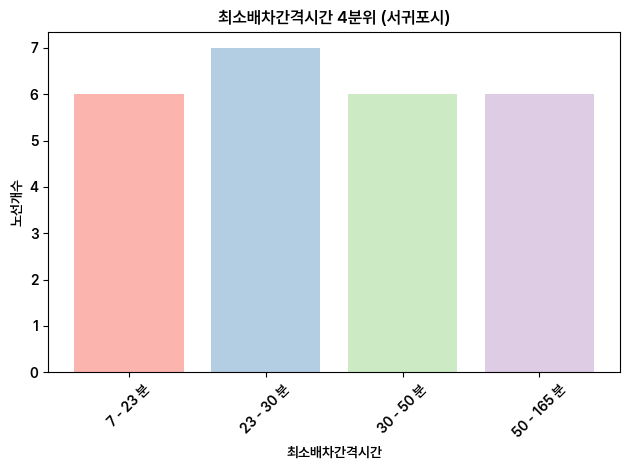

In [33]:
# '광역단체' 컬럼이 '서귀포시'인 경우에 대해서만 필터링
filtered_df = station_df[station_df['광역단체'] == '서귀포시']

# 최소배차간격시간을 기준으로 데이터를 정렬합니다.
sorted_df = filtered_df.sort_values(by='최소배차간격시간')

# 최소배차간격시간 열의 값들을 5분위로 나눕니다.
quantiles = sorted_df['최소배차간격시간'].quantile([0, 0.25, 0.5, 0.75, 1])

# 5분위 값들을 리스트로 변환합니다.
quantiles_list = quantiles.tolist()

# 각 분위의 시간 범위를 계산합니다.
time_ranges = [f'{int(quantiles_list[i])} - {int(quantiles_list[i+1])} 분' for i in range(len(quantiles_list)-1)]

# 분위별로 데이터를 그룹화하고 각 그룹의 개수를 세어줍니다.
grouped_df = sorted_df.groupby(pd.cut(sorted_df['최소배차간격시간'], bins=quantiles_list)).size()

# 시각화를 위해 바 그래프를 사용합니다.
colors = plt.cm.Pastel1(range(len(grouped_df)))  # Pastel1 팔레트에서 색상 생성
plt.bar(time_ranges, grouped_df.values, color=colors)
plt.xlabel('최소배차간격시간')
plt.ylabel('노선개수')
plt.title('최소배차간격시간 4분위 (서귀포시)')
plt.xticks(rotation=45)  # x축 라벨을 45도로 회전하여 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()


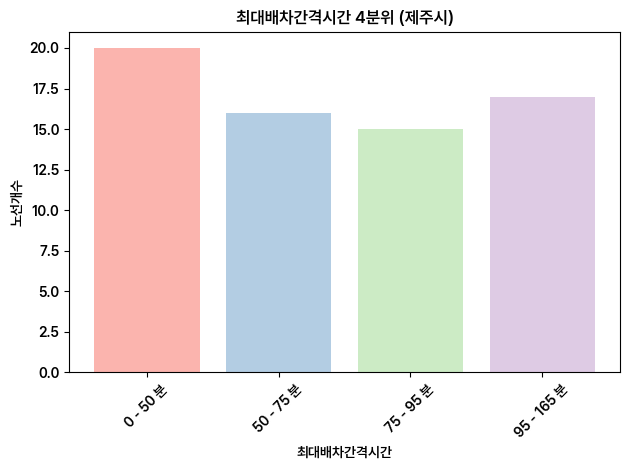

In [34]:
# '광역단체' 컬럼이 '제주시'인 경우에 대해서만 필터링
filtered_df = station_df[station_df['광역단체'] == '제주시']

# 최대배차간격시간을 기준으로 데이터를 정렬합니다.
sorted_df = filtered_df.sort_values(by='최대배차간격시간')

# 최대배차간격시간 열의 값들을 5분위로 나눕니다.
quantiles = sorted_df['최대배차간격시간'].quantile([0, 0.25, 0.5, 0.75, 1])

# 5분위 값들을 리스트로 변환합니다.
quantiles_list = quantiles.tolist()

# 각 분위의 시간 범위를 계산합니다.
time_ranges = [f'{int(quantiles_list[i])} - {int(quantiles_list[i+1])} 분' for i in range(len(quantiles_list)-1)]

# 분위별로 데이터를 그룹화하고 각 그룹의 개수를 세어줍니다.
grouped_df = sorted_df.groupby(pd.cut(sorted_df['최대배차간격시간'], bins=quantiles_list)).size()

# 시각화를 위해 바 그래프를 사용합니다.
colors = plt.cm.Pastel1(range(len(grouped_df)))  # Pastel1 팔레트에서 색상 생성
plt.bar(time_ranges, grouped_df.values, color=colors)
plt.xlabel('최대배차간격시간')
plt.ylabel('노선개수')
plt.title('최대배차간격시간 4분위 (제주시)')
plt.xticks(rotation=45)  # x축 라벨을 45도로 회전하여 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()


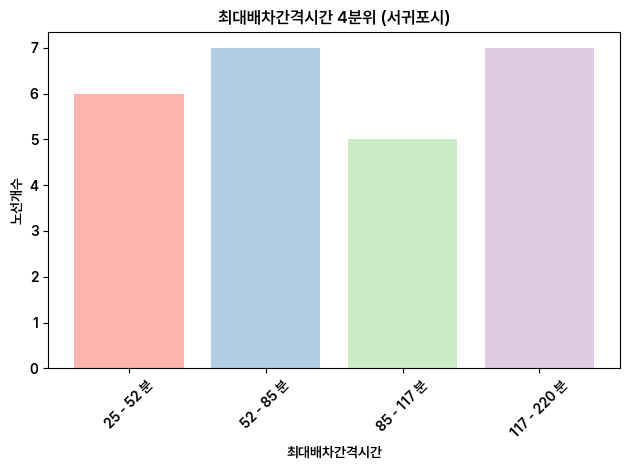

In [35]:
# '광역단체' 컬럼이 '서귀포시'인 경우에 대해서만 필터링
filtered_df = station_df[station_df['광역단체'] == '서귀포시']

# 최대배차간격시간을 기준으로 데이터를 정렬합니다.
sorted_df = filtered_df.sort_values(by='최대배차간격시간')

# 최대배차간격시간 열의 값들을 5분위로 나눕니다.
quantiles = sorted_df['최대배차간격시간'].quantile([0, 0.25, 0.5, 0.75, 1])

# 5분위 값들을 리스트로 변환합니다.
quantiles_list = quantiles.tolist()

# 각 분위의 시간 범위를 계산합니다.
time_ranges = [f'{int(quantiles_list[i])} - {int(quantiles_list[i+1])} 분' for i in range(len(quantiles_list)-1)]

# 분위별로 데이터를 그룹화하고 각 그룹의 개수를 세어줍니다.
grouped_df = sorted_df.groupby(pd.cut(sorted_df['최대배차간격시간'], bins=quantiles_list)).size()

# 시각화를 위해 바 그래프를 사용합니다.
colors = plt.cm.Pastel1(range(len(grouped_df)))  # Pastel1 팔레트에서 색상 생성
plt.bar(time_ranges, grouped_df.values, color=colors)
plt.xlabel('최대배차간격시간')
plt.ylabel('노선개수')
plt.title('최대배차간격시간 4분위 (서귀포시)')
plt.xticks(rotation=45)  # x축 라벨을 45도로 회전하여 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

C:\Users\bank-1\AppData\Local\Temp\ipykernel_30320\3186942886.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(filtered_df['최대배차간격시간'], bins=30, color='skyblue', edgecolor='black', linewidth=0, palette='pastel')


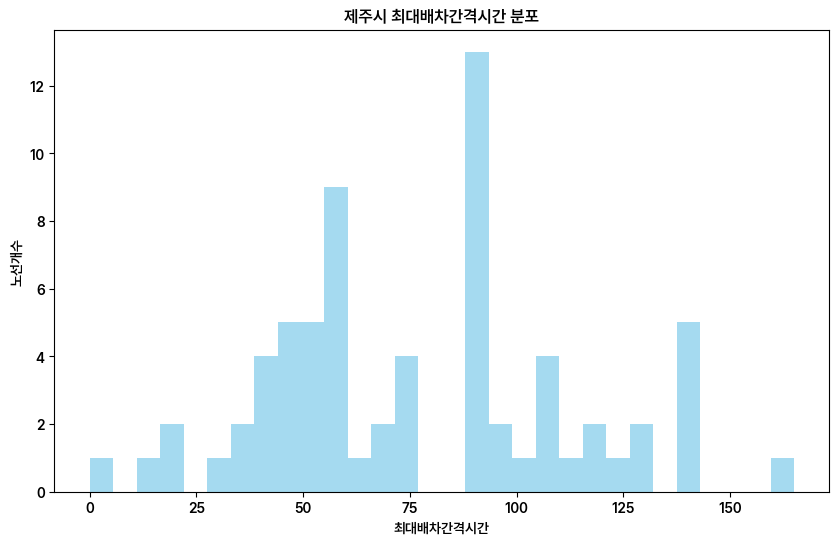

In [38]:
# '광역단체'가 '제주시'인 데이터 추출
filtered_df = station_df[station_df['광역단체'] == '제주시']

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['최대배차간격시간'], bins=30, color='skyblue', edgecolor='black', linewidth=0, palette='pastel')
plt.xlabel('최대배차간격시간')
plt.ylabel('노선개수')
plt.title('제주시 최대배차간격시간 분포')
plt.grid(False)  # 배경의 십자(격자)를 없애기 위해 False로 설정
plt.show()

C:\Users\bank-1\AppData\Local\Temp\ipykernel_30320\3216101944.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(filtered_df_seogwipo['최대배차간격시간'], bins=30, color='skyblue', edgecolor='black', linewidth=0, palette='pastel')


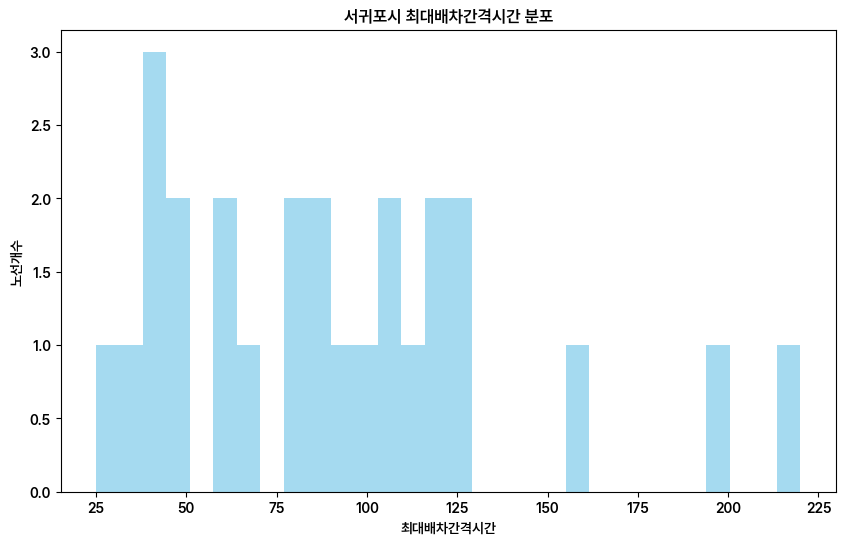

In [39]:
# '광역단체'가 '서귀포시'인 데이터 추출
filtered_df_seogwipo = station_df[station_df['광역단체'] == '서귀포시']

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_seogwipo['최대배차간격시간'], bins=30, color='skyblue', edgecolor='black', linewidth=0, palette='pastel')
plt.xlabel('최대배차간격시간')
plt.ylabel('노선개수')
plt.title('서귀포시 최대배차간격시간 분포')
plt.grid(False)  # 배경의 십자(격자)를 없애기 위해 False로 설정
plt.show()

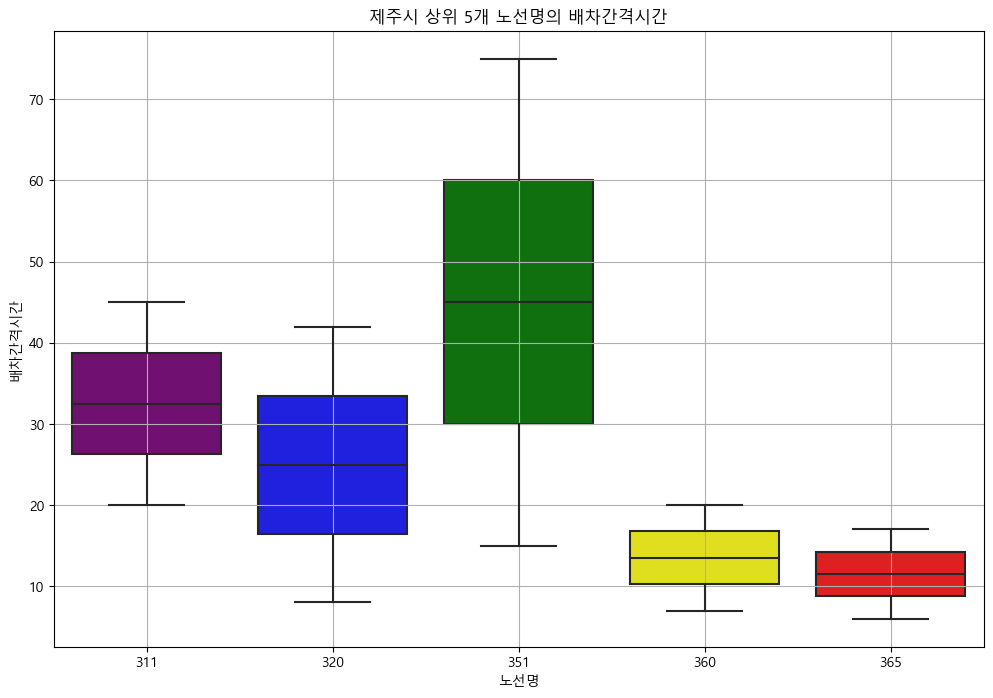

In [54]:
# 주어진 노선명들
target_routes = [365, 360, 320, 351, 311]

# 주어진 노선명에 해당하는 데이터 필터링
filtered_data = station_df[station_df['노선명'].isin(target_routes)]

# 새로운 DataFrame 생성
expanded_data = pd.DataFrame(columns=['노선명', '배차간격'])

# 각 노선에 대해 최소배차간격부터 최대배차간격까지의 값을 새로운 DataFrame에 추가
for route in target_routes:
    min_interval = filtered_data[filtered_data['노선명'] == route]['최소배차간격시간'].values[0]
    max_interval = filtered_data[filtered_data['노선명'] == route]['최대배차간격시간'].values[0]
    intervals = np.arange(min_interval, max_interval + 1)
    df = pd.DataFrame({'노선명': [route]*len(intervals), '배차간격': intervals})
    expanded_data = pd.concat([expanded_data, df], ignore_index=True)

# 시각화를 위해 새로운 DataFrame의 데이터로 상자그림 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='노선명', y='배차간격', data=expanded_data, palette=['purple', 'blue', 'green', 'yellow', 'red'])
plt.xlabel('노선명')
plt.ylabel('배차간격시간')
plt.title('제주시 상위 5개 노선명의 배차간격시간')
plt.grid(True)
plt.show()

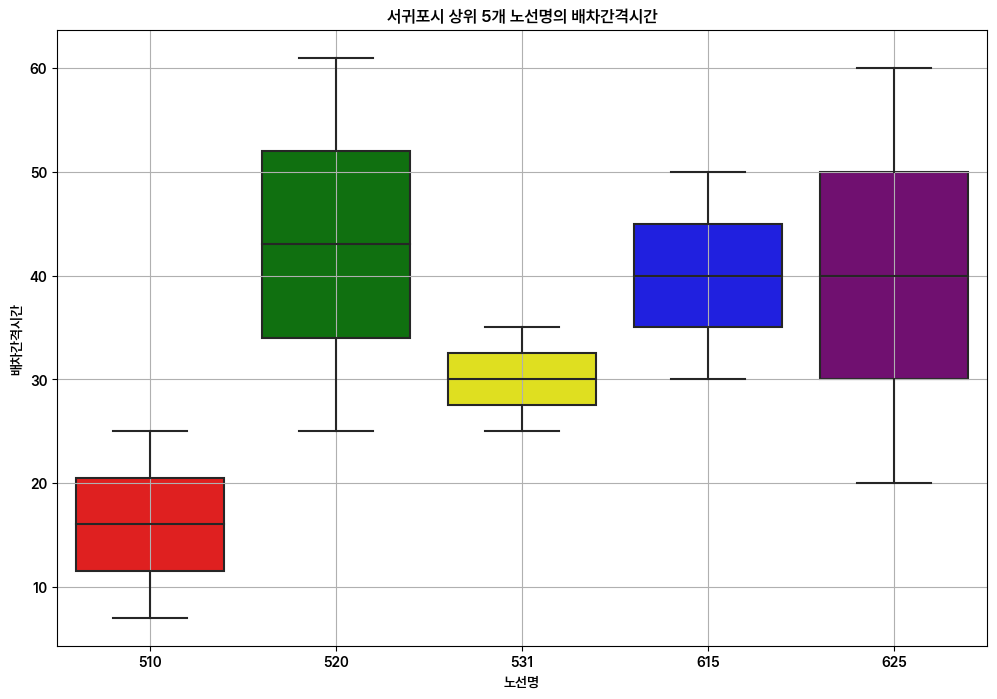

In [41]:
# 주어진 노선명들
target_routes_seogwipo = [510, 531, 615, 520, 625]

# 주어진 노선명에 해당하는 데이터 필터링
filtered_data_seogwipo = station_df[station_df['노선명'].isin(target_routes_seogwipo)]

# 새로운 DataFrame 생성
expanded_data_seogwipo = pd.DataFrame(columns=['노선명', '배차간격'])

# 각 노선에 대해 최소배차간격부터 최대배차간격까지의 값을 새로운 DataFrame에 추가
for route_seogwipo in target_routes_seogwipo:
    min_interval_seogwipo = filtered_data_seogwipo[filtered_data_seogwipo['노선명'] == route_seogwipo]['최소배차간격시간'].values[0]
    max_interval_seogwipo = filtered_data_seogwipo[filtered_data_seogwipo['노선명'] == route_seogwipo]['최대배차간격시간'].values[0]
    intervals_seogwipo = np.arange(min_interval_seogwipo, max_interval_seogwipo + 1)
    df_seogwipo = pd.DataFrame({'노선명': [route_seogwipo]*len(intervals_seogwipo), '배차간격': intervals_seogwipo})
    expanded_data_seogwipo = pd.concat([expanded_data_seogwipo, df_seogwipo], ignore_index=True)

# 시각화를 위해 새로운 DataFrame의 데이터로 상자그림 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='노선명', y='배차간격', data=expanded_data_seogwipo, palette=['red', 'green', 'yellow', 'blue', 'purple'])
plt.xlabel('노선명')
plt.ylabel('배차간격시간')
plt.title('서귀포시 상위 5개 노선명의 배차간격시간')
plt.grid(True)
plt.show()